# Анализ учебных результатов студентов

На вход получены 2 файла:

- intermediate_grades -> промежуточные результаты студентов в рамках 6 сессий.

- final_grades -> результаты финального экзамена, разбитые на побальные оценки за каждое из заданий.

Мощность множества студентов равна 114.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Инициализация dataFrame
Первым шагом будет считывание данных их обработка в один экземплят dataFrame:
    1. Данные об экзамене разбиты на 2 листа в эксель файле, считываем их, т.к. у студентов была одна попытка, то рез-таты с одного листа не пересекаются с другими (уникальные наборы student_id на каждом листе), используем статический метод concat, для объединения в один dataFrame
    2. Используя статический метод merge построково соединяем данные о результатах сессий и экзамена для каждого студента

In [58]:
dataSession = pd.read_excel('./intermediate_grades.xlsx')
dataFirstExam = pd.read_excel('./final_grades.xlsx', sheetname=0)
dataSecondExam = pd.read_excel('./final_grades.xlsx', sheetname=1)

examData = pd.concat([dataFirstExam, dataSecondExam])
resultData = pd.merge(dataSession, examData, how='inner', on='Student ID',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)

resultData = resultData.drop(labels=['Student ID' ], axis=1)
resultData

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),...,ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points),TOTAL (100 points)
0,5.0,0.0,4.5,4.0,2.25,2.0,3.0,1.0,0.5,1.0,...,2.0,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,...,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0
2,3.5,3.5,4.5,4.0,0.00,2.0,3.0,1.0,2.0,1.0,...,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
3,6.0,4.0,5.0,3.5,2.75,2.0,3.0,1.0,0.5,1.0,...,2.0,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0
4,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,...,2.0,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5
5,5.5,3.5,4.5,3.0,3.00,2.0,3.0,2.0,3.0,1.0,...,0.0,3.0,15.0,7.0,2.0,9.0,3.0,13.0,15.0,82.0
6,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,...,0.0,3.0,5.0,4.0,0.0,0.0,3.0,17.0,10.0,52.5
7,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,...,2.0,3.0,15.0,10.0,1.0,2.5,0.0,20.0,12.0,78.0
8,4.0,3.5,4.0,3.0,0.00,0.5,3.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
9,0.0,3.0,4.0,4.0,2.00,2.0,3.0,1.0,0.5,1.0,...,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,18.5


## Выводим первые 5 строк

In [27]:
resultData.head()

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),...,ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points),TOTAL (100 points)
0,5.0,0.0,4.5,4.0,2.25,2.0,3.0,1.0,0.5,1.0,...,2.0,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,...,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0
2,3.5,3.5,4.5,4.0,0.00,2.0,3.0,1.0,2.0,1.0,...,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
3,6.0,4.0,5.0,3.5,2.75,2.0,3.0,1.0,0.5,1.0,...,2.0,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0
4,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,...,2.0,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5


## Выводим последние 5 строк

In [28]:
resultData.tail()

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),...,ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points),TOTAL (100 points)
109,4.5,4.0,4.0,3.5,2.00,2.0,3.0,1.0,1.5,1.0,...,2.0,3.0,12.0,3.0,0.0,0.0,0.0,2.0,1.0,31.5
110,2.0,0.0,0.0,3.5,0.00,2.0,3.0,1.0,1.5,1.0,...,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.5
111,6.0,0.0,4.5,4.0,2.75,2.0,3.0,1.0,1.5,1.0,...,2.0,3.0,15.0,9.0,2.0,8.0,3.0,24.5,13.0,92.0
112,0.0,3.5,0.0,0.0,0.00,2.0,3.0,1.5,0.0,1.0,...,2.0,3.0,3.0,4.0,0.0,0.0,0.0,7.0,15.0,45.5
113,0.0,3.5,0.0,0.0,0.00,2.0,3.0,1.0,1.5,1.0,...,2.0,3.0,7.0,7.5,1.0,1.5,1.5,25.0,10.0,71.0


 # Расшифровка полей
 
 - `Student Id` – Идентификатор студента, убираем его, т.к. он был необходим только для склеивания данных в один dataFrame, в дальнейшем будем ориентироваться на порядковый номер строки.
 
- `Session N` - множество столбцов, в каждом из которых содержатся данные об оценке студентов в сессию под номером N
- `ES n.m` - множество столбцов с оценками студентов за задание под номером n.m в финальном экзамене
- `TOTAL` - представляет собой сумму всех столбцов из множества `ES n.m`


## Выводим данные о размере таблицы и названия столбцов:

In [70]:
print(resultData.shape)

#TODO сделать нормальные названия, сделал
resultData.columns=[resultData.columns[c].split('\n')[0] for c in range(0, resultData.columns.size)]
print(resultData.columns)





(114, 22)
Index(['Session 2', 'Session 3', 'Session 4', 'Session 5', 'Session 6',
       'ES 1.1 ', 'ES 1.2 ', 'ES 2.1', 'ES 2.2', 'ES 3.1', 'ES 3.2', 'ES 3.3',
       'ES 3.4', 'ES 3.5', 'ES 4.1', 'ES 4.2', 'ES 5.1', 'ES 5.2', 'ES 5.3',
       'ES 6.1', 'ES 6.2', 'TOTAL'],
      dtype='object')


In [71]:
resultData.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64', length=114)

## Первичный осмотр данных, выявление зависимостей

In [72]:
resultData.describe()

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1,ES 1.2,ES 2.1,ES 2.2,ES 3.1,...,ES 3.4,ES 3.5,ES 4.1,ES 4.2,ES 5.1,ES 5.2,ES 5.3,ES 6.1,ES 6.2,TOTAL
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.241228,2.460526,4.285088,3.416667,1.984649,1.881579,2.855263,1.372807,1.179825,0.956140,...,1.785088,2.311404,9.605263,5.491228,0.947368,4.131579,1.535088,10.421053,6.846491,54.460526
std,1.913196,1.406598,1.080743,1.122806,1.077364,0.372166,0.487561,0.567604,0.989161,0.194634,...,0.616762,1.245151,5.715014,3.500305,0.888392,3.926342,1.183813,9.448879,5.775339,27.420694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2.000000,1.500000,4.000000,3.500000,1.500000,2.000000,3.000000,1.000000,0.000000,1.000000,...,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.500000
50%,3.500000,3.000000,4.500000,4.000000,2.125000,2.000000,3.000000,1.000000,1.500000,1.000000,...,2.000000,3.000000,13.000000,4.500000,1.000000,4.000000,1.500000,8.000000,6.500000,54.000000
75%,4.500000,3.500000,5.000000,4.000000,2.750000,2.000000,3.000000,2.000000,2.000000,1.000000,...,2.000000,3.000000,15.000000,9.750000,2.000000,8.000000,3.000000,19.000000,12.750000,78.750000
max,6.000000,4.000000,5.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,1.000000,...,2.000000,3.000000,15.000000,10.000000,2.000000,10.000000,3.000000,25.000000,15.000000,98.000000


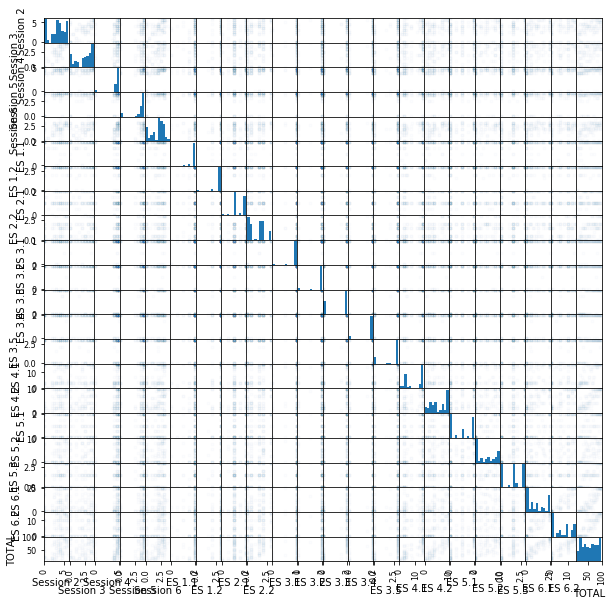

In [73]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(resultData, alpha = .01, figsize = (10, 10))
pass

In [74]:
resultData.corr()

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1,ES 1.2,ES 2.1,ES 2.2,ES 3.1,...,ES 3.4,ES 3.5,ES 4.1,ES 4.2,ES 5.1,ES 5.2,ES 5.3,ES 6.1,ES 6.2,TOTAL
Session 2,1.000000,0.568362,0.242503,0.430672,0.427394,0.136797,0.137376,0.071288,0.270308,0.099960,...,-0.055047,0.116781,0.224279,0.334319,0.266566,0.310578,0.415290,0.296129,0.396428,0.374333
Session 3,0.568362,1.000000,0.201031,0.299078,0.440493,0.134684,0.117409,0.085101,0.332708,0.179487,...,0.076842,0.182664,0.239685,0.393561,0.193074,0.181616,0.257267,0.281914,0.351930,0.354046
Session 4,0.242503,0.201031,1.000000,0.318756,0.474067,0.002171,0.016021,0.229143,0.110974,-0.024172,...,0.112646,-0.018878,0.294551,0.278463,0.232368,0.261676,0.280896,0.159945,0.171541,0.259885
Session 5,0.430672,0.299078,0.318756,1.000000,0.439702,0.045003,-0.054558,0.070008,0.165004,-0.047244,...,0.009052,-0.054068,0.173423,0.214287,0.146385,0.148546,0.165337,0.186429,0.171669,0.205120
Session 6,0.427394,0.440493,0.474067,0.439702,1.000000,0.028533,0.063122,0.289827,0.275610,-0.135123,...,0.121513,0.128935,0.413842,0.469006,0.380546,0.351684,0.365573,0.383792,0.397853,0.475640
ES 1.1,0.136797,0.134684,0.002171,0.045003,0.028533,1.000000,0.453373,0.074691,0.226632,0.416345,...,0.080912,0.252155,0.285721,0.279418,0.201800,0.234836,0.345962,0.237019,0.224092,0.337519
ES 1.2,0.137376,0.117409,0.016021,-0.054558,0.063122,0.453373,1.000000,0.100772,0.127843,0.212279,...,0.131075,0.155073,0.228628,0.200186,0.222321,0.188014,0.196698,0.127641,0.188464,0.247794
ES 2.1,0.071288,0.085101,0.229143,0.070008,0.289827,0.074691,0.100772,1.000000,0.273587,-0.131048,...,0.066579,0.015844,0.203997,0.270026,0.280565,0.266677,0.227302,0.154865,0.180938,0.265916
ES 2.2,0.270308,0.332708,0.110974,0.165004,0.275610,0.226632,0.127843,0.273587,1.000000,0.202210,...,0.150941,0.457089,0.517915,0.483530,0.380955,0.415963,0.440450,0.388788,0.397570,0.569359
ES 3.1,0.099960,0.179487,-0.024172,-0.047244,-0.135123,0.416345,0.212279,-0.131048,0.202210,1.000000,...,0.068223,0.367241,0.139437,0.181285,0.165661,0.158161,0.265991,0.118400,0.049066,0.196579


Так как столбец `TOTAL` представляет собой сумму слотбцов из множества `ES n.m`, очевидно, что у пунктов с максимальным лимитом баллов корреляция будет наиболее высокой, временно выбросим их и построим матрицу корреляций заново

In [81]:
esColumns = [resultData.columns[c] for c in range(5, resultData.columns.size - 1)]
tmpData = resultData.drop(labels=esColumns, axis=1)
tmpData.corr()


,Session 2,Session 3,Session 4,Session 5,Session 6,TOTAL
Session 2,1.000000,0.568362,0.242503,0.430672,0.427394,0.374333
Session 3,0.568362,1.000000,0.201031,0.299078,0.440493,0.354046
Session 4,0.242503,0.201031,1.000000,0.318756,0.474067,0.259885
Session 5,0.430672,0.299078,0.318756,1.000000,0.439702,0.205120
Session 6,0.427394,0.440493,0.474067,0.439702,1.000000,0.475640
TOTAL,0.374333,0.354046,0.259885,0.205120,0.475640,1.000000


Корреляция между результатами конкретных сессий и рез-татом итогового экзамена слишком мала, поэтому будем рассматривать зависимость результатов упражнения 6.1 и рез-татом финального экзамена. Построим график:

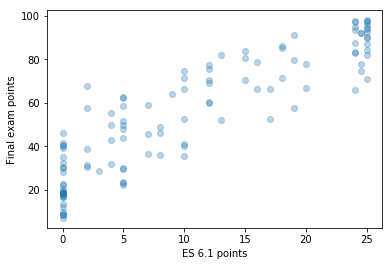

In [98]:
plt.plot(resultData['ES 6.1'], resultData['TOTAL'], 'o', alpha = 0.3)
plt.xlabel('ES 6.1 points')
plt.ylabel('Final exam points')
pass

В описании сказано, что экзамен является пройденым, если кол-во баллов > 60, сгенерируем такой столбец и впоследствии разобьем множество студентов на 2 класса.

In [93]:
resultData['Passed'] = resultData['TOTAL'] > 60.0
resultData

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1,ES 1.2,ES 2.1,ES 2.2,ES 3.1,...,ES 3.5,ES 4.1,ES 4.2,ES 5.1,ES 5.2,ES 5.3,ES 6.1,ES 6.2,TOTAL,Passed
0,5.0,0.0,4.5,4.0,2.25,2.0,3.0,1.0,0.5,1.0,...,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5,True
1,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,...,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0,False
2,3.5,3.5,4.5,4.0,0.00,2.0,3.0,1.0,2.0,1.0,...,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0,True
3,6.0,4.0,5.0,3.5,2.75,2.0,3.0,1.0,0.5,1.0,...,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0,False
4,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,...,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5,False
5,5.5,3.5,4.5,3.0,3.00,2.0,3.0,2.0,3.0,1.0,...,3.0,15.0,7.0,2.0,9.0,3.0,13.0,15.0,82.0,True
6,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,...,3.0,5.0,4.0,0.0,0.0,3.0,17.0,10.0,52.5,False
7,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,...,3.0,15.0,10.0,1.0,2.5,0.0,20.0,12.0,78.0,True
8,4.0,3.5,4.0,3.0,0.00,0.5,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,False
9,0.0,3.0,4.0,4.0,2.00,2.0,3.0,1.0,0.5,1.0,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,18.5,False


In [96]:
esColumns = [resultData.columns[c] for c in range(5, resultData.columns.size - 1)]
tmpData = resultData.drop(labels=esColumns, axis=1)
tmpData.corr()

,Session 2,Session 3,Session 4,Session 5,Session 6,Passed
Session 2,1.000000,0.568362,0.242503,0.430672,0.427394,0.325993
Session 3,0.568362,1.000000,0.201031,0.299078,0.440493,0.340301
Session 4,0.242503,0.201031,1.000000,0.318756,0.474067,0.212500
Session 5,0.430672,0.299078,0.318756,1.000000,0.439702,0.216998
Session 6,0.427394,0.440493,0.474067,0.439702,1.000000,0.419948
Passed,0.325993,0.340301,0.212500,0.216998,0.419948,1.000000


Так же было интересно рассмотреть зависимость среднего балла за все сессии и финальных результатов:

In [117]:
sessionsColumns = [resultData.columns[c] for c in range(0, 5)]

resultData['avgSession'] = resultData[sessionColumns].mean(axis = 1)

esColumns = [resultData.columns[c] for c in range(5, resultData.columns.size - 3)]
tmpData = resultData.drop(labels=esColumns, axis=1)
tmpData.corr()

,Session 2,Session 3,Session 4,Session 5,Session 6,TOTAL,Passed,avgSession
Session 2,1.000000,0.568362,0.242503,0.430672,0.427394,0.374333,0.325993,0.821873
Session 3,0.568362,1.000000,0.201031,0.299078,0.440493,0.354046,0.340301,0.738583
Session 4,0.242503,0.201031,1.000000,0.318756,0.474067,0.259885,0.212500,0.565450
Session 5,0.430672,0.299078,0.318756,1.000000,0.439702,0.205120,0.216998,0.668122
Session 6,0.427394,0.440493,0.474067,0.439702,1.000000,0.475640,0.419948,0.738388
TOTAL,0.374333,0.354046,0.259885,0.205120,0.475640,1.000000,0.869172,0.469327
Passed,0.325993,0.340301,0.212500,0.216998,0.419948,0.869172,1.000000,0.425348
avgSession,0.821873,0.738583,0.565450,0.668122,0.738388,0.469327,0.425348,1.000000


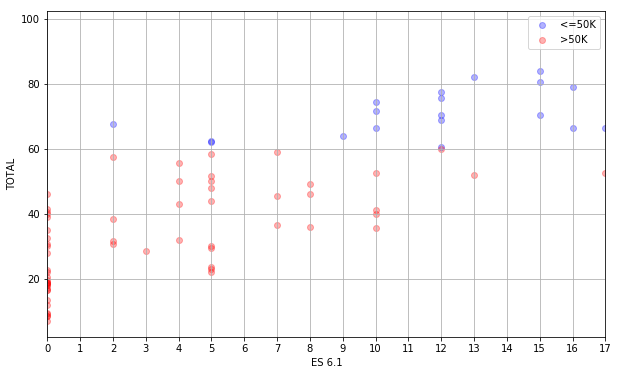

In [113]:
data = resultData

plt.figure(figsize = (10, 6))

plt.scatter(data[data['Passed'] == True]['ES 6.1'],
            data[data['Passed'] == True]['TOTAL'],
            alpha = 0.3,
            label = '<=50K',
            color = 'b')

plt.scatter(data[data['Passed'] == False]['ES 6.1'],
            data[data['Passed'] == False]['TOTAL'],
            alpha = 0.3,
            label = '>50K',
            color = 'r')

plt.xlabel('ES 6.1')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('TOTAL')
plt.legend()
plt.grid()

In [121]:
data.describe(include = 'all')

,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1,ES 1.2,ES 2.1,ES 2.2,ES 3.1,...,ES 4.1,ES 4.2,ES 5.1,ES 5.2,ES 5.3,ES 6.1,ES 6.2,TOTAL,Passed,avgSession
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114,114.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN
mean,3.241228,2.460526,4.285088,3.416667,1.984649,1.881579,2.855263,1.372807,1.179825,0.956140,...,9.605263,5.491228,0.947368,4.131579,1.535088,10.421053,6.846491,54.460526,NaN,3.077632
std,1.913196,1.406598,1.080743,1.122806,1.077364,0.372166,0.487561,0.567604,0.989161,0.194634,...,5.715014,3.500305,0.888392,3.926342,1.183813,9.448879,5.775339,27.420694,NaN,0.953617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,0.700000
25%,2.000000,1.500000,4.000000,3.500000,1.500000,2.000000,3.000000,1.000000,0.000000,1.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.500000,NaN,2.562500
50%,3.500000,3.000000,4.500000,4.000000,2.125000,2.000000,3.000000,1.000000,1.500000,1.000000,...,13.000000,4.500000,1.000000,4.000000,1.500000,8.000000,6.500000,54.000000,NaN,3.200000
75%,4.500000,3.500000,5.000000,4.000000,2.750000,2.000000,3.000000,2.000000,2.000000,1.000000,...,15.000000,9.750000,2.000000,8.000000,3.000000,19.000000,12.750000,78.750000,NaN,3.737500


## Задача

Будем решать задачу классификации:
    - Множество классов бинарное - пройден ли итоговый экзамен {0, 1}
    - Множество входных данных описывается столбцами с результатами сессий

- Уберем столбцы с результатами конкретных заданий, они нас интересовать не будут
- Изменяем тип столбца `Passed` на `int`

In [137]:
data = resultData.drop(labels=[resultData.columns[c] for c in range(5, resultData.columns.size - 2)], axis = 1)
data['Passed'] = [1 if c == True else 0 for c in data['Passed']]
data

,Session 2,Session 3,Session 4,Session 5,Session 6,Passed,avgSession
0,5.0,0.0,4.5,4.0,2.25,1,3.15
1,4.0,3.5,4.5,4.0,1.00,0,3.40
2,3.5,3.5,4.5,4.0,0.00,1,3.10
3,6.0,4.0,5.0,3.5,2.75,0,4.25
4,5.0,4.0,5.0,4.0,2.75,0,4.15
5,5.5,3.5,4.5,3.0,3.00,1,3.90
6,4.0,4.0,4.5,4.0,2.00,0,3.70
7,4.0,4.0,4.5,4.0,2.00,1,3.70
8,4.0,3.5,4.0,3.0,0.00,0,2.90
9,0.0,3.0,4.0,4.0,2.00,0,2.60


# Готовим данные

In [129]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['Session 2', 'Session 3', 'Session 4', 'Session 5', 'Session 6', 'Passed', 'avgSession']


Категорийные признаки отсутствуют

## Обрабатываем пропущенные значения

Пропущенные значения отсутствуют

## Векторизация

Категориальными признаки отсутствуют, векторизация не требуется

## Нормализация количественных признаков

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [138]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Session 2,Session 3,Session 4,Session 5,Session 6,Passed,avgSession
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.241228,2.460526,4.285088,3.416667,1.984649,0.447368,3.077632
std,1.913196,1.406598,1.080743,1.122806,1.077364,0.499417,0.953617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000
25%,2.000000,1.500000,4.000000,3.500000,1.500000,0.000000,2.562500
50%,3.500000,3.000000,4.500000,4.000000,2.125000,0.000000,3.200000
75%,4.500000,3.500000,5.000000,4.000000,2.750000,1.000000,3.737500
max,6.000000,4.000000,5.000000,4.000000,4.000000,1.000000,4.600000


In [139]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [140]:
data_numerical.describe()

,Session 2,Session 3,Session 4,Session 5,Session 6,Passed,avgSession
count,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,114.000000,1.140000e+02,1.140000e+02
mean,-6.232831e-17,-1.928282e-16,-4.674623e-17,2.337312e-16,0.000000,-3.116416e-17,1.729611e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.694143e+00,-1.749275e+00,-3.964946e+00,-3.042972e+00,-1.842134,-8.957805e-01,-2.493278e+00
25%,-6.487719e-01,-6.828722e-01,-2.637886e-01,7.421882e-02,-0.449847,-8.957805e-01,-5.401873e-01
50%,1.352563e-01,3.835310e-01,1.988560e-01,5.195317e-01,0.130272,-8.957805e-01,1.283204e-01
75%,6.579418e-01,7.389987e-01,6.615006e-01,5.195317e-01,0.710392,1.106552e+00,6.919641e-01
max,1.441970e+00,1.094466e+00,6.615006e-01,5.195317e-01,1.870631,1.106552e+00,1.596416e+00


# X и y

In [141]:
X = data.drop(('Passed'), axis = 1)
y = data['Passed']
feature_names = X.columns


In [142]:
type(feature_names)

pandas.indexes.base.Index

In [143]:
feature_names

Index(['Session 2', 'Session 3', 'Session 4', 'Session 5', 'Session 6',
       'avgSession'],
      dtype='object')

In [144]:
print(X.shape)
print(y.shape)
N, d = X.shape

(114, 6)
(114,)


In [145]:
type(X)

pandas.core.frame.DataFrame

In [146]:
type(y)

pandas.core.series.Series

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

79 35


In [148]:
79+35

114

# $k$NN

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [150]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [151]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.26582278481 0.342857142857


In [152]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [153]:
err_test

0.34285714285714286

In [154]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[16  2]
 [10  7]]


In [155]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [166]:
from sklearn.model_selection import GridSearchCV
nnb = range(1, 20)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.291139240506 16


In [167]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.291139240506 0.314285714286


# SVC

In [158]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.227848101266 0.285714285714


### Подбор параметров

In [159]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.30379746835443033 100.0


In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [161]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.101265822785 0.2


### Значимость признаков

In [81]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [82]:
np.sum(rf.feature_importances_)

0.99999999999999967

In [83]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'fnlwgt' (0.206736)
 2. feature '  age' (0.183969)
 3. feature 'education-num' (0.135674)
 4. feature 'hours-per-week' (0.100523)
 5. feature 'marital-status_Married-civ-spouse' (0.071025)
 6. feature 'relationship_Husband' (0.047541)
 7. feature 'marital-status_Never-married' (0.024367)
 8. feature 'occupation_Exec-managerial' (0.021841)
 9. feature '  sex' (0.013883)
10. feature 'occupation_Prof-specialty' (0.012760)
11. feature 'workclass_Private' (0.011500)
12. feature 'relationship_Not-in-family' (0.011351)
13. feature 'relationship_Wife' (0.010969)
14. feature 'occupation_Other-service' (0.009693)
15. feature 'workclass_Self-emp-not-inc' (0.009357)
16. feature 'relationship_Own-child' (0.009145)
17. feature 'workclass_Self-emp-inc' (0.007903)
18. feature 'race_White' (0.007806)
19. feature 'occupation_Sales' (0.007469)
20. feature 'marital-status_Divorced' (0.007117)
21. feature 'occupation_Craft-repair' (0.007087)
22. feature 'workclass_Local-gov' (0

In [84]:
feature_names[[1,0,1]]

Index(['fnlwgt', 'age', 'fnlwgt'], dtype='object')

(-1, 20)

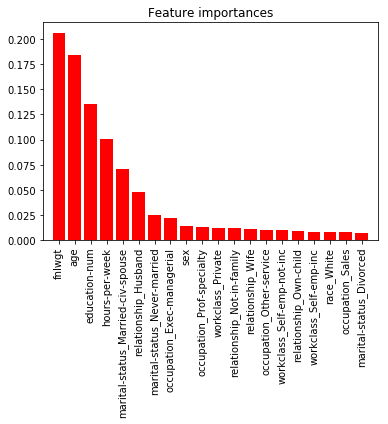

In [85]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [162]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.101265822785 0.285714285714


# AdaBoost

In [163]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.101265822785 0.257142857143


# GBT

In [164]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.101265822785 0.314285714286
